In [53]:
import pandas as pd  
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from regressors import stats
# from sklearn import linear_model
# from regressors import stats
# from sklearn import metrics
%matplotlib inline

In [54]:
#pull in data from csv
housing_census_df = pd.read_csv("../Output/Chicago_Housing_and_Census_Data.csv")

yelp_df = pd.read_csv("../Output/Yelp_Data.csv")

crime_df = pd.read_csv("../Output/Crime_Count_by_Zip.csv")

airbnb_df = pd.read_csv("../Output/AirBnB_Reviews_Zipcode.csv")
airbnb_df.head()

,Zipcode,AirBnB Review Count
0,46327,2.0
1,60202,0.0
2,60302,37.0
3,60304,1.0
4,60456,2.0


In [55]:
yelp_housing_df = pd.merge(yelp_df, housing_census_df, how='inner', on='Zipcode')
yelp_crime_housing_df = pd.merge(yelp_housing_df, crime_df, how='inner', on='Zipcode')
all_data_df = pd.merge(yelp_crime_housing_df, airbnb_df, how='inner', on='Zipcode')
housing_census_df.head()

,Zipcode,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60601,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,1171.0,8.432347,41.883993,-87.619706
1,60602,1666.0,NaN,1277.0,31.1,115774.0,77279.0,32.0,2.505873,41.883473,-87.629127
2,60603,1630.0,NaN,1197.0,26.7,140114.0,106207.0,261.0,21.804511,41.880916,-87.625425
3,60604,1835.0,NaN,668.0,40.6,114565.0,130966.0,127.0,19.011976,41.878485,-87.627893
4,60605,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,2312.0,8.828471,41.870331,-87.623574


In [56]:
all_data_df['Nightlife per 1000 People'] = (all_data_df['Total Nightlife']/ all_data_df['Population'])*1000
all_data_df['Entertainment per 1000 People'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant'])/ all_data_df['Population'])*1000
all_data_df['Restaurants per 1000 People'] = (all_data_df['Total Restaurant']/ all_data_df['Population'])*1000
all_data_df['Grocery per 1000 People'] = (all_data_df['Total Grocery']/ all_data_df['Population'])*1000
all_data_df['Crime per 1000 People']=(all_data_df['Crime Count']/all_data_df['Population'])*1000
all_data_df['Total Entertainment'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant']))
all_data_df['Total Amenity'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant']+all_data_df['Total Grocery']))
all_data_df.head()


,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Lng,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Entertainment per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Total Entertainment,Total Amenity
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,-87.619706,1087,11.0,3.456470,14.257939,10.801469,0.504069,78.274645,198,205
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,-87.629127,8086,19.0,8.613939,69.694597,61.080658,0.000000,6332.028191,89,89
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,-87.625425,2086,10.0,18.379282,98.579783,80.200501,0.835422,1742.690058,118,119
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,-87.627893,1062,22.0,7.485030,68.862275,61.377246,0.000000,1589.820359,46,46
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,-87.623574,2387,20.0,1.298305,5.575073,4.276768,0.267298,91.148618,146,153


In [57]:
len(all_data_df)

57

In [58]:
#add a downtown dummy variable to signify if the zipcode is downtown.  These zips have different relationships to the
#independent variables
all_data_df["Downtown"] = " "
for index, row in all_data_df.iterrows():
    if row['Zipcode']==60602:
        all_data_df.loc[index, 'Downtown'] = 1
    elif row['Zipcode']==60603:
        all_data_df.loc[index, 'Downtown']= 1
    elif row['Zipcode']==60604:
        all_data_df.loc[index, 'Downtown']=1
    elif row['Zipcode']==60606:
        all_data_df.loc[index, 'Downtown']=1
    else:
        all_data_df.loc[index, 'Downtown']=0
all_data_df.head()

,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Entertainment per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Total Entertainment,Total Amenity,Downtown
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,1087,11.0,3.456470,14.257939,10.801469,0.504069,78.274645,198,205,0
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,8086,19.0,8.613939,69.694597,61.080658,0.000000,6332.028191,89,89,1
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,2086,10.0,18.379282,98.579783,80.200501,0.835422,1742.690058,118,119,1
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,1062,22.0,7.485030,68.862275,61.377246,0.000000,1589.820359,46,46,1
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,2387,20.0,1.298305,5.575073,4.276768,0.267298,91.148618,146,153,0


In [78]:
#x = all_data_df[["Household Income", "AirBnB Review Count", "Entertainment per 1000 People", 
            #     ]].values
#first gives better p values second gives better r2
x = all_data_df[[ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Amenity", "Crime Count"]].values
# x = all_data_df[[ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Entertainment", "Total Grocery", "Crime Count", "Downtown"]].values
# y = all_data_df['Median Rent'].values

In [79]:
regressor = LinearRegression()
regressor.fit(x, y)

#get r squared
xlabels = [ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Amenity", "Crime Count"]
# xlabels = [ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Entertainment", "Total Grocery", "Crime Count", "Downtown"]


stats.summary(regressor, x, y, xlabels)

Residuals:
      Min       1Q  Median       3Q       Max
-394.5753 -81.0878  0.3391  94.2109  255.2972


Coefficients:
                        Estimate  Std. Error  t value   p value
_intercept           1462.550793  110.576247  13.2266  0.000000
Household Income        0.002002    0.000284   7.0397  0.000000
Poverty Count          -0.009911    0.002518  -3.9354  0.000232
AirBnB Review Count     5.430084    1.470631   3.6924  0.000505
Total Amenity           0.745259    0.211366   3.5259  0.000850
Crime Count            -0.016349    0.007301  -2.2394  0.029118
---
R-squared:  0.65916,    Adjusted R-squared:  0.62574
F-statistic: 19.73 on 5 features


In [80]:
y_pred = regressor.predict(x)

In [69]:
zipcode =all_data_df['Zipcode'].tolist()
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
# df_residual = df
# df_residual['residual']=df_residual['Predicted']-df_residual['Actual']
# plt.scatter(df_residual['Predicted'],df_residual['residual'])
plt.show()
df_subset = df.head(15)

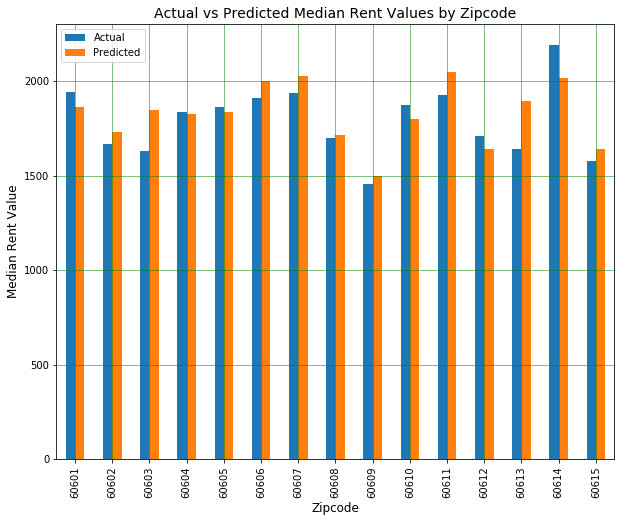

In [70]:
df_subset.plot(kind='bar',figsize=(10,8))
tick_locations = [value for value in range(0,len(df_subset))]
plt.xticks(tick_locations, zipcode)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Median Rent Values by Zipcode", fontsize=14)
plt.ylabel("Median Rent Value", fontsize=12)
plt.xlabel("Zipcode", fontsize=12)
plt.savefig("../Images/Actual_vs_Predicted_Median_Rent.png", bbox_inches="tight")
plt.show()

In [71]:
#correlation_data = all_data_df[["Median Rent", "Household Income", "Poverty Count", "AirBnB Review Count", "Nightlife per 1000 People", 
          #              "Restaurants per 1000 People", "Grocery per 1000 People", "Crime per 1000 People" ]]
correlation_data = all_data_df[["Median Rent", "Household Income", "AirBnB Review Count", "Total Nightlife", 
                        "Total Restaurant", "Total Grocery", "Total Entertainment", "Total Amenity","Crime Count" ]]
correlation_data.head()

,Median Rent,Household Income,AirBnB Review Count,Total Nightlife,Total Restaurant,Total Grocery,Total Entertainment,Total Amenity,Crime Count
0,1944.0,110215.0,11.0,48,150,7,198,205,1087
1,1666.0,115774.0,19.0,11,78,0,89,89,8086
2,1630.0,140114.0,10.0,22,96,1,118,119,2086
3,1835.0,114565.0,22.0,5,41,0,46,46,1062
4,1865.0,107811.0,20.0,34,112,7,146,153,2387


In [72]:
correlation_data.corr(method ='pearson') 

,Median Rent,Household Income,AirBnB Review Count,Total Nightlife,Total Restaurant,Total Grocery,Total Entertainment,Total Amenity,Crime Count
Median Rent,1.000000,0.661071,0.142537,0.605822,0.509172,0.182558,0.559246,0.550937,-0.522145
Household Income,0.661071,1.000000,-0.217836,0.459147,0.404535,-0.185462,0.436466,0.407352,-0.553283
AirBnB Review Count,0.142537,-0.217836,1.000000,0.161494,0.155386,0.320528,0.162386,0.178433,0.286577
Total Nightlife,0.605822,0.459147,0.161494,1.000000,0.868124,0.407408,0.941845,0.934749,-0.209384
Total Restaurant,0.509172,0.404535,0.155386,0.868124,1.000000,0.549693,0.984434,0.985565,-0.210693
Total Grocery,0.182558,-0.185462,0.320528,0.407408,0.549693,1.000000,0.516424,0.566122,-0.020102
Total Entertainment,0.559246,0.436466,0.162386,0.941845,0.984434,0.516424,1.000000,0.998253,-0.216788
Total Amenity,0.550937,0.407352,0.178433,0.934749,0.985565,0.566122,0.998253,1.000000,-0.210072
Crime Count,-0.522145,-0.553283,0.286577,-0.209384,-0.210693,-0.020102,-0.216788,-0.210072,1.000000


In [98]:
from scipy.stats import sem
from scipy import stats

t- test

In [99]:
all_data_df.head(10)

,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Entertainment per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Total Entertainment,Total Amenity,Downtown
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,1087,11.0,3.456470,14.257939,10.801469,0.504069,78.274645,198,205,0
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,8086,19.0,8.613939,69.694597,61.080658,0.000000,6332.028191,89,89,1
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,2086,10.0,18.379282,98.579783,80.200501,0.835422,1742.690058,118,119,1
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,1062,22.0,7.485030,68.862275,61.377246,0.000000,1589.820359,46,46,1
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,2387,20.0,1.298305,5.575073,4.276768,0.267298,91.148618,146,153,0
5,60606,22,163,3,1910.0,407000.0,2959.0,35.2,139179.0,132803.0,...,1352,27.0,7.434944,62.521122,55.086178,1.013856,456.911119,185,188,1
6,60607,81,221,6,1937.0,355900.0,28928.0,30.1,92240.0,54282.0,...,3943,50.0,2.800055,10.439712,7.639657,0.207412,136.303927,302,308,0
7,60608,34,151,22,1698.0,258700.0,78877.0,32.2,41226.0,19903.0,...,3861,46.0,0.431051,2.345424,1.914373,0.278915,48.949630,185,207,0
8,60609,10,90,8,1455.0,165800.0,60994.0,32.3,33959.0,16491.0,...,3967,25.0,0.163951,1.639506,1.475555,0.131160,65.039184,100,108,0
9,60610,71,131,11,1874.0,296900.0,39345.0,33.7,81576.0,80153.0,...,6405,31.0,1.804549,5.134070,3.329521,0.279578,162.790698,202,213,0


In [124]:
downtown = all_data_df.loc[all_data_df["Downtown"] == 1, :]
rest_of_Chicago = all_data_df.loc[all_data_df["Downtown"] == 0, :]

In [131]:
downtown_means = np.mean(downtown["Crime Count"])
downtown_sem = sem(downtown["Crime Count"])
# downtown_means

rec_means = np.mean(rest_of_Chicago["Crime Count"])
rec_sem = sem(rest_of_Chicago["Crime Count"])

means = [downtown_means, rec_means]
sems = [downtown_sem, rec_sem]
labels = ["Downtown", "Rest of Chicago"]

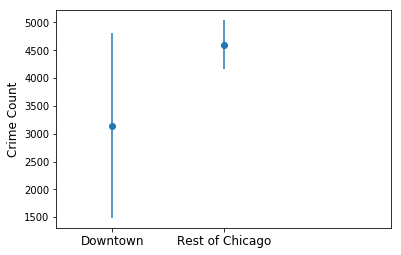

In [132]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels, fontsize=12)
ax.set_xticks([0, 1])

ax.set_ylabel("Crime Count", fontsize=12)

plt.show()

In [133]:
# Run the t-test
(t_stat, p) = stats.ttest_ind(downtown["Crime Count"], rest_of_Chicago["Crime Count"], equal_var=False)

In [134]:
print(f'the p value is {p}')

if p < 0.05:
    print(" And the difference in sample means is significant.")
else:
    print("And the difference in sample means is not significant.")

the p value is 0.45143677614276806
And the difference in sample means is not significant.
